In [1]:
import pandas as pd
import os
import torch

In [2]:
from basicRNN import *
print(device)

cuda


self.spacing 1
data.shape torch.Size([4992, 100])
labels.shape torch.Size([4992, 1])
labels scales tensor([0.9581])


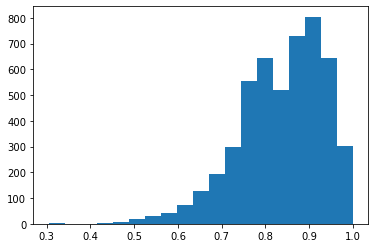

labels scales tensor([0.8363])
train_dataset 3994
test_dataset 998


In [3]:
ts = trainingService('paramsConfigMLP4.yml')
ts.loadData()

In [4]:
ts.setupModel()

In [5]:
# ts.loadModel()

In [6]:
ts.trainModel(learning_rate=1e-3, num_epochs=50)
ts.trainModel(learning_rate=1e-4, num_epochs=100)
ts.trainModel(learning_rate=1e-5, num_epochs=200)
ts.trainModel(learning_rate=1e-6, num_epochs=400)

Epoch [5/50]], Loss: 0.000723, , Loss Val: 0.001649
Epoch [10/50]], Loss: 0.002548, , Loss Val: 0.001865
Epoch [15/50]], Loss: 0.000980, , Loss Val: 0.000465
Epoch [20/50]], Loss: 0.002153, , Loss Val: 0.000994
Epoch [25/50]], Loss: 0.000831, , Loss Val: 0.002148
Epoch [30/50]], Loss: 0.001504, , Loss Val: 0.002014
Epoch [35/50]], Loss: 0.000915, , Loss Val: 0.001395
Epoch [40/50]], Loss: 0.000812, , Loss Val: 0.000998
Epoch [45/50]], Loss: 0.001735, , Loss Val: 0.001248
Epoch [50/50]], Loss: 0.000763, , Loss Val: 0.001636
Epoch [5/100]], Loss: 0.000960, , Loss Val: 0.001428
Epoch [10/100]], Loss: 0.000647, , Loss Val: 0.000649
Epoch [15/100]], Loss: 0.000674, , Loss Val: 0.000952
Epoch [20/100]], Loss: 0.000607, , Loss Val: 0.000975
Epoch [25/100]], Loss: 0.001302, , Loss Val: 0.000631
Epoch [30/100]], Loss: 0.000286, , Loss Val: 0.000618
Epoch [35/100]], Loss: 0.000755, , Loss Val: 0.000786
Epoch [40/100]], Loss: 0.001044, , Loss Val: 0.000852
Epoch [45/100]], Loss: 0.001041, , Loss 

In [9]:
ts.saveModel()

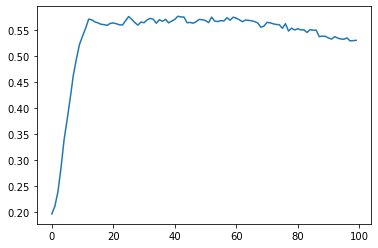

Mean/Median Absolute error TEST: 0.020604689 0.013972759
Mean/Median Absolute error TRAIN: 0.0198432557269871 0.014033973217010498
R^2 0.9121909664769112
Mean/Median Relative error TEST: 0.027346957359803574 0.01668398069641467
Mean/Median Relative error TRAIN: 0.02578299046836286 0.01646077908334697


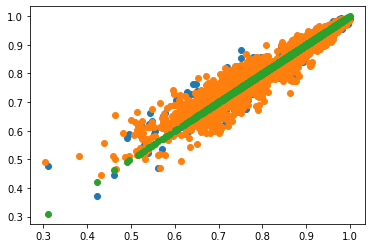

IndexError: index 1 is out of bounds for dimension 1 with size 1

In [10]:
for l_ind in range(3):

    ts.model.eval()
    test_errors = []
    test_labels = []
    test_predictions = []

    running_loss1 = 0.0
    with torch.no_grad():  # No need to track gradients during evaluation
        for i, (inputsT, labelsT) in enumerate(ts.test_loader):
            inputsT = inputsT.to(device)
            labelsT = labelsT.to(device)[:,l_ind]
            outputsT = ts.model(inputsT)[:,l_ind]
            errorsT = outputsT - labelsT
            test_errors.extend(errorsT.cpu().numpy())
            test_labels.extend(labelsT.view(-1).tolist())
            test_predictions.extend(outputsT.view(-1).tolist())
            lossV = ts.criterion(outputsT, labelsT)
            running_loss1 += lossV.cpu().item()

    train_errors = []
    train_labels = []
    train_predictions = []
    with torch.no_grad():  # No need to track gradients during evaluation
        for i, (inputs, labels) in enumerate(ts.train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)[:,l_ind]
            outputs = ts.model(inputs)[:,l_ind]
            # Compute the error for each sample
            errors = outputs - labels
            train_errors.extend(errors.view(-1).tolist())
            train_labels.extend(labels.view(-1).tolist())
            train_predictions.extend(outputs.view(-1).tolist())
            if i==0:
                pp = inputs[1].cpu().numpy()
                plt.plot(pp)
                plt.show()

    #plt.plot(test_errors1)
    #plt.plot(train_errors)
    #plt.show()
    test_labels = np.array(test_labels)
    train_labels = np.array(train_labels)
    test_predictions = np.array(test_predictions)
    train_predictions = np.array(train_predictions)

    plt.scatter(test_labels, test_predictions)
    plt.scatter(train_labels, train_predictions)

    plt.scatter(test_labels, test_labels)

    test_abs_errors = np.abs(test_errors)
    train_abs_errors = np.abs(train_errors)
    print("Mean/Median Absolute error TEST:", np.mean(test_abs_errors), np.median(test_abs_errors))
    print("Mean/Median Absolute error TRAIN:", np.mean(train_abs_errors), np.median(train_abs_errors))

    print("R^2", 1-np.mean(np.square(test_abs_errors))/np.var(test_labels))

    test_labels[test_labels == 0.0] = 1
    train_labels[train_labels == 0.0] = 1
    print("Mean/Median Relative error TEST:", np.mean(np.abs(test_errors)/np.abs(test_labels)), np.median(np.abs(test_errors)/np.abs(test_labels)))
    print("Mean/Median Relative error TRAIN:", np.mean(np.abs(train_errors)/np.abs(train_labels)), np.median(np.abs(train_errors)/np.abs(train_labels)))
    #plt.ylim(0, 1)
    #plt.xlim(0, 1)
    plt.show()

In [ ]:
# Example usage
#ts.criterion = nn.MSELoss(reduction='none')  # Set reduction='none' to get individual errors
test_errors, test_labels, test_predictions = ts.testModel()
plt.plot(test_errors)
plt.show()
print(np.mean(np.abs(test_errors)))
plt.scatter(test_labels, test_predictions)

In [ ]:
print( torch.std_mean(ts.data_loader.labels) )
olStd, olMean  = torch.std_mean(ts.data_loader.data, dim=1 )
#print( ts.data_loader.labels )
#print( olMean )
#print( olStd )
print( olMean.shape, olStd.shape )

In [ ]:
import matplotlib.pyplot as plt

bins = 20
t = torch.tensor([0., 0., 1., 1., 0., 1., 1., 0., 0., 0.])
hist = torch.histc(ts.data_loader.labels, bins=bins, min=0, max=2)
x = range(bins)
plt.bar(x, hist, align='center')
plt.xlabel('Bins')

In [ ]:
print( ts.data_loader.labels.shape )
print( olMean[:,0].shape)
#print( olStd )
#plt.scatter(torch.sqrt(torch.sum(torch.square(olMean), axis=1)), ts.data_loader.labels )
plt.scatter(torch.sum(torch.square(olStd), axis=1), ts.data_loader.labels, s=4 )
plt.ylim(0, 2.)
plt.xlim(0, 2000*1000)
plt.show()

In [ ]:
#print( olStd )
olStd[390,:] = 0

plt.plot(olStd[:,0])
plt.plot(olStd[:,1])
plt.plot(olStd[:,2])
plt.plot(olStd[:,3])
plt.ylim(0, 2000)

plt.show()

In [ ]:
import torch.nn.functional as F

alldata = ts.data_loader.data.numpy()
print(alldata.shape)
red1 = np.sqrt(np.sum(np.square(ts.data_loader.data.numpy()), axis=1))
print(red1.shape)
pp_sum = np.mean(red1, axis=0)
print(pp_sum.shape)
plt.plot(np.log(pp_sum))
plt.show()

for ii in range(0,10,1):
    pp = ts.data_loader.data[77, :, ii].numpy()
    plt.plot(pp)

plt.show()

#for ii in range(10):
#    plt.plot(torch.sqrt(torch.sum(torch.square(ts.data_loader.data[ii, :, :]), axis=1)))
#    plt.axhline(y=ts.data_loader.labels[ii].data*1e3, color='r', linestyle='-')
#    plt.show()

#plt.plot(ts.data_loader.data[77, :, 4])
#plt.plot(ts.data_loader.data[77, :, 5])
